<a href="https://colab.research.google.com/github/Wenjia1215/Wenjia_ML_DDoS_experiments/blob/main/BDCloud_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><strong>BDCloud Presentation</strong></h1>


12/10/2022
</br>
<h1>Paper Title: Curse of Feature Selection: a Comparison Experiment of DDoS Detection Using Classification Techniques</h1>



<br/>Decision Tree (DT), k-Nearest Neighbors (KNN), Logistic Regression (LR), and Random Forest (RF), every classifier is used to fit 3 models with 3 different feature sets.
<br/>
4*3=12

Goal: use Traffic data to predict which one is DDoS attack and which one is normal traffic.</br>


In [1]:
!gdown --id 1V9Kn7QL6knFDB1TRSIPqm0Jne5beDHZP

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1V9Kn7QL6knFDB1TRSIPqm0Jne5beDHZP
To: /content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
100% 77.1M/77.1M [00:00<00:00, 198MB/s]


In [2]:
import pandas as pd

# see complete rows in pandas
# use pd.set_option('max_colwidth', <width>) for column width & pd.set_option('max_rows', <rows>) for number of rows.

pd.set_option('max_rows', 80)

In [3]:
file_path = '/content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'

In [4]:
ddos_data = pd.read_csv(file_path)

In [5]:

ddos_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Preprocess data</br>

In [6]:
#data preprocessing
# NaN
# infinity

# Deleted
  # Flow ID
  # Source IP
  # Source Port
  # Destination IP
  # Timestamp
  # Protocol

**bold text**
Replacing missing values

In [7]:
ddos_data.isnull().sum().sum()

4

In [8]:
ddos_data = ddos_data.fillna(ddos_data.median())

<ipython-input-8-bd3994a4c951>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ddos_data = ddos_data.fillna(ddos_data.median())


In [9]:
ddos_data.isnull().sum().sum()

0

  Replace Infinity values with "0"


In [10]:
import numpy as np
ddos_data.isin([np.inf, -np.inf]).sum().sum()


64

In [11]:
ddos_data.replace([np.inf, -np.inf], 0, inplace=True)

In [12]:
ddos_data.isin([np.inf, -np.inf]).sum().sum()

0

In [13]:
ddos_data = ddos_data.replace(to_replace = "BENIGN", value = 0)
ddos_data = ddos_data.replace(to_replace = "DDoS", value = 1)

To make sure all data meaningful,</br>
Drop missing value again.

In [14]:
#count the total amount of row
ddos_data.shape[0]

225745

In [15]:
# drop missings
ddos_data = ddos_data.dropna(axis=0)

In [16]:
#count again
ddos_data.shape[0]
# the number is same, it proves that the data preprocess is efficient.

225745

Preprocess IP address<br/>
To prevent having many features you have to encode IP addresses in your training data and treat new IP as unknown
<br/> Hot encoding


CIC-IDS2017

In [17]:
# Pros:
# 1, The model can more easily identify IP's that belong to the same subnet.
# 2, The number of features remains small even for a large number of distinct IP addresses in your training data.
# Reference: https://www.quora.com/How-can-I-deal-with-IP-addresses-in-machine-learning-algorithms-in-traffic-analysis-and-anomaly-detection

In [18]:
# from sklearn import preprocessing
# ip_encoder = preprocessing.LabelBinarizer()

In [19]:
# ip_encoder.fit_transform(ddos_data.Flow_ID)

In [20]:
ddos_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [21]:
list(ddos_data.columns)

[' Destination Port',
 ' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 'Fwd PSH Flags',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' P

In [22]:
y = ddos_data[' Label']
# print(y)

Feature selection

# feature selection


In [23]:
cols = []
# for row in ddos_data:
#         cols.append(row)
        
# print(cols)
# print(len(cols))
cols = list(ddos_data.columns)
print(cols,'\n',len(cols))

[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag 

In [24]:
# calculate the mutual information score of every feature


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)



# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores of All Features ")
    # plt.annotate(label, # this is the text
    #               (x,y), # these are the coordinates to position the label
    #               textcoords="offset points", # how to position the text
    #               xytext=(0,10), # distance from text to points (x,y)
    #               ha='center') # horizontal alignment can be left, right or center



1. The ddos dataset has seventy-eight features
2. Identify the features with the most potential.

3. Use the make_mi_scores function (introduced in the tutorial) to compute mutual information scores for the ddos features:

In [25]:
#  = ddos_data
X_allFeatures = ddos_data.drop(columns = ' Label')

In [29]:
mi_scores = make_mi_scores(X_allFeatures, y)

Google Colab could lose connection once in a while and it takes forever to calculate MI scores. <br/>
Save all the MI info here for checking.

In [30]:
## saving MI scores here

mi_scores_save = {'Fwd IAT Total': 1.418770,' Fwd IAT Max': 1.406533, ' Flow Duration':1.054842,' Flow IAT Max': 0.762656, ' Bwd IAT Max':0.751763, 'Bwd IAT Total': 0.728302,
             'Total Length of Fwd Packets': 0.660043,' Subflow Fwd Bytes': 0.660043, ' Average Packet Size': 0.561962,' Destination Port': 0.560211,
             ' Fwd Header Length': 0.549934, ' Fwd Header Length.1': 0.549934, ' Subflow Bwd Bytes':0.549766, ' Total Length of Bwd Packets': 0.549766, ' Avg Bwd Segment Size': 0.543892, 
             ' Bwd Packet Length Mean': 0.541197, 'Bwd Packet Length Max': 0.534044, 
             'Init_Win_bytes_forward': 0.511645, ' Fwd Packet Length Max':0.506397, ' Fwd Packet Length Mean': 0.489626, ' Avg Fwd Segment Size': 0.486742, ' Bwd Header Length': 0.481922,
             ' Fwd IAT Mean': 0.448178,' Active Min': 0.443257, 
            ' Active Max': 0.438722,' Init_Win_bytes_backward': 0.420977,' Total Fwd Packets': 0.417196,'Subflow Fwd Packets': 0.417196, ' act_data_pkt_fwd': 0.406938,' Fwd IAT Std': 0.404124,
            ' Packet Length Mean': 0.394575,' Packet Length Variance': 0.368877,' Packet Length Std': 0.367918,' Bwd Packet Length Std': 0.350168,' Fwd Packet Length Std': 0.349950,' Bwd Packets/s': 0.342176,
            ' Total Backward Packets': 0.334701,' Subflow Bwd Packets': 0.334701,' Bwd IAT Mean': 0.330619,' Bwd Packet Length Min': 0.315814,'Fwd Packets/s': 0.312244,' Max Packet Length': 0.302470,
             'Flow Bytes/s': 0.276330, ' Flow IAT Std': 0.250023,' Flow IAT Mean': 0.242019,' Bwd IAT Std': 0.239326,' Flow Packets/s': 0.236759,' Fwd IAT Min': 0.194920,' Bwd IAT Min': 0.193494, 'Active Mean': 0.178753,
            ' Fwd Packet Length Min': 0.178090, ' URG Flag Count': 0.174085, ' Min Packet Length': 0.160995,' Down/Up Ratio': 0.156501,' min_seg_size_forward': 0.151758,' Idle Min': 0.111512, ' Idle Max': 0.087672,
            ' SYN Flag Count': 0.071036, 'Fwd PSH Flags': 0.071036,' Flow IAT Min': 0.062931, 'Idle Mean': 0.061611, ' PSH Flag Count': 0.054747, 'FIN Flag Count': 0.043360,' ECE Flag Count': 0.041845,
            ' RST Flag Count': 0.041845,' Fwd Avg Packets/Bulk': 0.041752,' CWE Flag Count': 0.041752, 'Fwd Avg Bytes/Bulk': 0.041752,' Bwd URG Flags': 0.041752,' Fwd URG Flags': 0.041752,' Bwd PSH Flags': 0.041752,
             'Bwd Avg Bulk Rate': 0.041752,
            ' Bwd Avg Bytes/Bulk': 0.041752,' Fwd Avg Bulk Rate': 0.041752,' Bwd Avg Packets/Bulk': 0.041752,' ACK Flag Count': 0.027938,' Idle Std': 0.024116,' Active Std': 0.023413}

In [31]:

# print all 78 features
print(mi_scores.head(78))
#

Fwd IAT Total                   1.418770
 Fwd IAT Max                    1.406533
 Flow Duration                  1.054842
 Flow IAT Max                   0.762656
 Bwd IAT Max                    0.751763
Bwd IAT Total                   0.728302
Total Length of Fwd Packets     0.660043
 Subflow Fwd Bytes              0.660043
 Average Packet Size            0.561962
 Destination Port               0.560211
 Fwd Header Length              0.549934
 Fwd Header Length.1            0.549934
 Subflow Bwd Bytes              0.549766
 Total Length of Bwd Packets    0.549766
 Avg Bwd Segment Size           0.543892
 Bwd Packet Length Mean         0.541197
Bwd Packet Length Max           0.534044
Init_Win_bytes_forward          0.511645
 Fwd Packet Length Max          0.506397
 Fwd Packet Length Mean         0.489626
 Avg Fwd Segment Size           0.486742
 Bwd Header Length              0.481922
 Fwd IAT Mean                   0.448178
 Active Min                     0.443257
 Active Max     

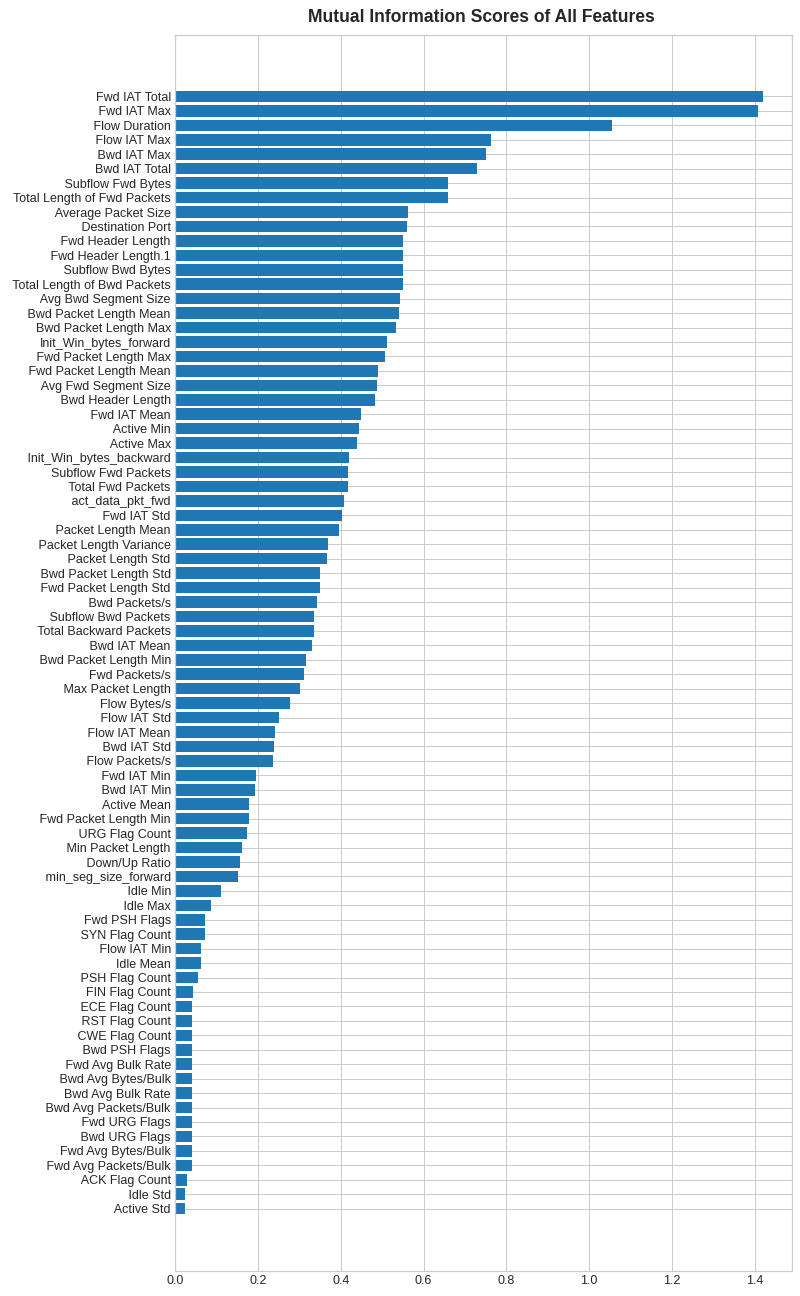

In [32]:
plt.figure(dpi=90, figsize=(9, 14.5))
plot_mi_scores(mi_scores.head(78))


In [33]:
# print(type(mi_scores)
for k,v in mi_scores.items():
  if v >= 0.5:
    print(k)

Fwd IAT Total
 Fwd IAT Max
 Flow Duration
 Flow IAT Max
 Bwd IAT Max
Bwd IAT Total
Total Length of Fwd Packets
 Subflow Fwd Bytes
 Average Packet Size
 Destination Port
 Fwd Header Length
 Fwd Header Length.1
 Subflow Bwd Bytes
 Total Length of Bwd Packets
 Avg Bwd Segment Size
 Bwd Packet Length Mean
Bwd Packet Length Max
Init_Win_bytes_forward
 Fwd Packet Length Max


In [34]:
# # using 16 features selected in paper "Proceedings 2020, 63, 51; doi:10.3390/proceedings2020063051"
# target_features_1 = [' Destination Port','Total Length of Fwd Packets',' Total Length of Bwd Packets',' Fwd Packet Length Max',' Fwd Packet Length Mean','Bwd Packet Length Max',
#                    ' Bwd Packet Length Mean',
#                    ' Fwd Header Length', ' Bwd Header Length',' Average Packet Size',' Avg Fwd Segment Size',' Avg Bwd Segment Size',' Fwd Header Length',' Subflow Fwd Bytes',' Subflow Bwd Bytes',
#                    'Init_Win_bytes_forward']

In [35]:
target_features_1 = []
for k,v in mi_scores.items():
  if v >= 0.5:
    target_features_1.append(k)
print(len(target_features_1))
print(target_features_1)

19
['Fwd IAT Total', ' Fwd IAT Max', ' Flow Duration', ' Flow IAT Max', ' Bwd IAT Max', 'Bwd IAT Total', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' Average Packet Size', ' Destination Port', ' Fwd Header Length', ' Fwd Header Length.1', ' Subflow Bwd Bytes', ' Total Length of Bwd Packets', ' Avg Bwd Segment Size', ' Bwd Packet Length Mean', 'Bwd Packet Length Max', 'Init_Win_bytes_forward', ' Fwd Packet Length Max']


In [36]:
# print(type(mi_scores)
target_features_2 = []
for k,v in mi_scores.items():
  if v >= 0.2:
    target_features_2.append(k)

print(target_features_2)

['Fwd IAT Total', ' Fwd IAT Max', ' Flow Duration', ' Flow IAT Max', ' Bwd IAT Max', 'Bwd IAT Total', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' Average Packet Size', ' Destination Port', ' Fwd Header Length', ' Fwd Header Length.1', ' Subflow Bwd Bytes', ' Total Length of Bwd Packets', ' Avg Bwd Segment Size', ' Bwd Packet Length Mean', 'Bwd Packet Length Max', 'Init_Win_bytes_forward', ' Fwd Packet Length Max', ' Fwd Packet Length Mean', ' Avg Fwd Segment Size', ' Bwd Header Length', ' Fwd IAT Mean', ' Active Min', ' Active Max', ' Init_Win_bytes_backward', ' Total Fwd Packets', 'Subflow Fwd Packets', ' act_data_pkt_fwd', ' Fwd IAT Std', ' Packet Length Mean', ' Packet Length Variance', ' Packet Length Std', ' Bwd Packet Length Std', ' Fwd Packet Length Std', ' Bwd Packets/s', ' Total Backward Packets', ' Subflow Bwd Packets', ' Bwd IAT Mean', ' Bwd Packet Length Min', 'Fwd Packets/s', ' Max Packet Length', 'Flow Bytes/s', ' Flow IAT Std', ' Flow IAT Mean', ' Bwd IAT Std'

In [37]:
# target_feature_2 = [
#     'Fwd IAT Total',                   
#  'Fwd IAT Max',
#  'Flow Duration',
#  'Flow IAT Max',
#  'Bwd IAT Max',
# 'Bwd IAT Total',
#  Subflow Fwd Bytes              0.660043
# Total Length of Fwd Packets     0.660043
#  Average Packet Size            0.561962
#  Destination Port               0.560211
#  Fwd Header Length              0.549934
#  Fwd Header Length.1            0.549934
#  Total Length of Bwd Packets    0.549766
#  Subflow Bwd Bytes              0.549766
#  Avg Bwd Segment Size           0.543892
#  Bwd Packet Length Mean         0.541197
# Bwd Packet Length Max           0.534044
# Init_Win_bytes_forward          0.511645
#  Fwd Packet Length Max          0.506397
#  Fwd Packet Length Mean         0.489626
#  Avg Fwd Segment Size           0.486742
#  Bwd Header Length              0.481922
#  Fwd IAT Mean                   0.448178
#  Active Min                     0.443257
#  Active Max                     0.438722
#  Init_Win_bytes_backward        0.420977
#  Total Fwd Packets              0.417196
# Subflow Fwd Packets             0.417196
#  act_data_pkt_fwd               0.406938
#  Fwd IAT Std                    0.404124
#  Packet Length Mean             0.394575
#  Packet Length Variance         0.368877
#  Packet Length Std              0.367918
#  Bwd Packet Length Std          0.350168
#  Fwd Packet Length Std          0.349950
#  Bwd Packets/s                  0.342176
#  Total Backward Packets         0.334701
#  Subflow Bwd Packets            0.334701
#  Bwd IAT Mean                   0.330619
#  Bwd Packet Length Min          0.315814
# Fwd Packets/s                   0.312244
#  Max Packet Length              0.302470
# Flow Bytes/s                    0.276330
#  Flow IAT Std                   0.250023
#  Flow IAT Mean                  0.242019
#  Bwd IAT Std                    0.239326
#  Flow Packets/s 
# ]

SyntaxError: ignored

In [38]:
# features MI greater than 0.5
X1 = ddos_data[target_features_1]
# features MI greater than 0.2
X2 = ddos_data[target_features_2]
# all features
X3 = X_allFeatures
# X3.head()

In [39]:
# print(len(X1.columns), len(X1))
# print(len(X2.columns), len(X2))
# print(len(X3.columns), len(X3))

In [40]:
# print(X1.columns)

In [41]:
X2.head()

,Fwd IAT Total,Fwd IAT Max,Flow Duration,Flow IAT Max,Bwd IAT Max,Bwd IAT Total,Total Length of Fwd Packets,Subflow Fwd Bytes,Average Packet Size,Destination Port,...,Subflow Bwd Packets,Bwd IAT Mean,Bwd Packet Length Min,Fwd Packets/s,Max Packet Length,Flow Bytes/s,Flow IAT Std,Flow IAT Mean,Bwd IAT Std,Flow Packets/s
0,3,3,3,3,0,0,12,12,9.0,54865,...,0,0.0,0,666666.666700,6,4.000000e+06,0.0,3.0,0.0,666666.66670
1,0,0,109,109,0,0,6,6,9.0,55054,...,1,0.0,6,9174.311927,6,1.100917e+05,0.0,109.0,0.0,18348.62385
2,0,0,52,52,0,0,6,6,9.0,55055,...,1,0.0,6,19230.769230,6,2.307692e+05,0.0,52.0,0.0,38461.53846
3,0,0,34,34,0,0,6,6,9.0,46236,...,1,0.0,6,29411.764710,6,3.529412e+05,0.0,34.0,0.0,58823.52941
4,3,3,3,3,0,0,12,12,9.0,54863,...,0,0.0,0,666666.666700,6,4.000000e+06,0.0,3.0,0.0,666666.66670


4, Training


Devide data to two part, one for training, one for testing(predicting)

In [42]:
# # split the data into validation data & training data, for both feature and target
from sklearn.model_selection import train_test_split
# # split the data using feature set X1
train_X1, validate_X1, train_y1, validate_y1 = train_test_split(X1, y, random_state = 0)

In [43]:
# split the data using feature set X2
train_X2, validate_X2, train_y2, validate_y2 = train_test_split(X2, y, random_state = 0)

In [44]:
# split the data using all features X3
train_X3, validate_X3, train_y3, validate_y3 = train_test_split(X3, y, random_state = 0)

In [45]:
print('x1:', len(train_X1))
print('x2:', len(train_X2))
print('x3:', len(train_X3))
print('x1.column:', len(train_X1.columns))
print('x2.column:', len(train_X2.columns))
print('x3.column:', len(train_X3.columns))

x1: 169308
x2: 169308
x3: 169308
x1.column: 19
x2.column: 47
x3.column: 78


4.1 (Experimental) prediction

In [46]:
print('train_y2', len(train_y2))
print('train_y3', len(train_y3))

train_y2 169308
train_y3 169308


Using K-Nearest Neighbors (KNN)


In [48]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error

#Create KNN Classifier
knn_model_1 = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn_model_1.fit(train_X1, train_y1)

#Predict the response for test dataset
y_pred_knn_1 = knn_model_1.predict(validate_X1)
mean_absolute_error(validate_y1, y_pred_knn_1)

0.0047486577954179

KNN X2 model

In [49]:
from sklearn.metrics import mean_absolute_error


# Create KNN Classifier
knn_model_2 = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn_model_2.fit(train_X2, train_y2)

#Predict the response for test dataset
y_pred_knn_2 = knn_model_2.predict(validate_X2)

#calculating MAE
mean_absolute_error(validate_y2, y_pred_knn_2)

0.002285734535854138

KNN X3 MODEL

In [ ]:

from sklearn.metrics import mean_absolute_error

#Create KNN Classifier
knn_model_3 = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn_model_3.fit(train_X3, train_y3)

#Predict the response for test dataset
y_pred_knn_3 = knn_model_3.predict(validate_X3)

#calculating MAE
mean_absolute_error(validate_y3, y_pred_knn_3)

Using SVM
<br/>svm x1 model

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm_model_1 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_model_1.fit(train_X1, train_y1)

#Predict the response for test dataset
y_pred_svm_1 = svm_model_1.predict(validate_X1)

mean_absolute_error(validate_y1, y_pred_svm_1)


<br/>svm X2 model


In [ ]:
#Create a svm Classifier
svm_model_2 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_model_2.fit(train_X2, train_y2)

#Predict the response for test dataset
y_pred_svm_2 = svm_model_2.predict(validate_X2)
mean_absolute_error(validate_y2, y_pred_svm_2)


<br/>svm X3 model


In [ ]:
#Create a svm Classifier
svm_model_3 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_model_3.fit(train_X3, train_y3)

#Predict the response for test dataset
y_pred_svm_3 = svm_model_3.predict(validate_X3)
mean_absolute_error(validate_y3, y_pred_svm_3)

Using LogisticRegression
<BR/>X1 MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
LR_model_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
LR_model_1.fit(train_X1, train_y1)
LR_predictions_1 = LR_model_1.predict(validate_X1)
mean_absolute_error(validate_y1, LR_predictions_1)

x2 MODEL

In [ ]:
LR_model_2 = LogisticRegression()
LR_model_2.fit(train_X2, train_y2)
LR_predictions_2 = LR_model_2.predict(validate_X2)
mean_absolute_error(validate_y1, LR_predictions_2)

x3 MODEL

In [ ]:
LR_model_3 = LogisticRegression()
LR_model_3.fit(train_X3, train_y3)
LR_predictions_3 = LR_model_3.predict(validate_X3)
mean_absolute_error(validate_y3, LR_predictions_3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
forest_model1 = RandomForestRegressor(random_state=1)
forest_model1.fit(train_X1, train_y1)
RF_prediction_1 = forest_model1.predict(validate_X1)
mean_absolute_error(validate_y1, RF_prediction_1)

In [ ]:

forest_model2 = RandomForestRegressor(random_state=1)
forest_model2.fit(train_X2, train_y2)
RF_prediction_2 = forest_model2.predict(validate_X2)
mean_absolute_error(validate_y2, RF_prediction_2)

In [ ]:
forest_model3 = RandomForestRegressor(random_state=1)
forest_model3.fit(train_X3, train_y3)
RF_prediction_3 = forest_model3.predict(validate_X3)
mean_absolute_error(validate_y3, RF_prediction_3)